In [243]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# for upset plots
from itertools import combinations, chain
from upsetplot import from_memberships
from math import comb
import upsetplot


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)



In [4]:

# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]
# seperate and concatenate by species
steg_it = []
steg_pt = []
mmus_it = []
mmus_pt = []

for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"]=="STeg":
        steg_it.append(omc_it[i])
        steg_pt.append(omc_pt[i])
    elif metadata.loc[i,"species"]=="MMus":
        mmus_it.append(omc_it[i])
        mmus_pt.append(omc_pt[i])

st_it_all = pd.concat(steg_it)
st_pt_all = pd.concat(steg_pt)
mm_it_all = pd.concat(mmus_it)
mm_pt_all = pd.concat(mmus_pt)

# Functions

# Upset barplots w/ mean/std

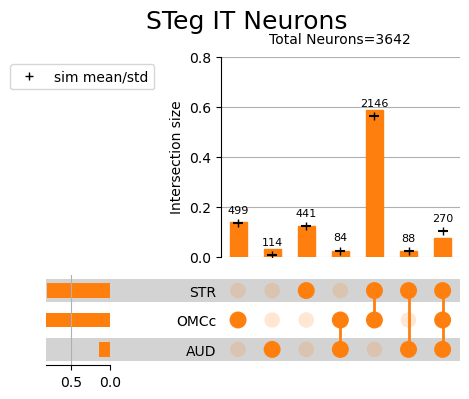

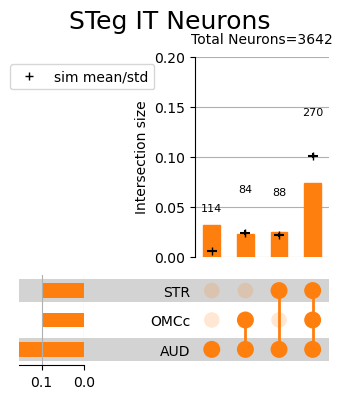

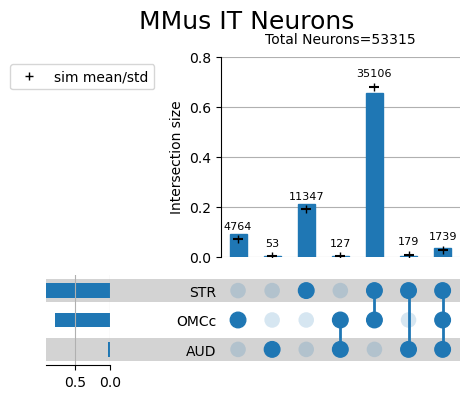

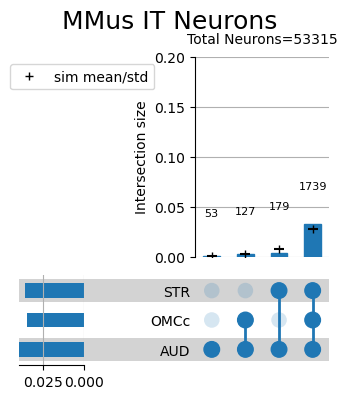

In [31]:
plot_it = ["OMCc", "AUD", "STR"]

# plot steg
fancy_upsetplot(st_it_all, plot_it, reps=500, title="STeg IT Neurons", ymax=0.8)
# plt.savefig(out_path+"st_it_upset.jpg", dpi=300)
plt.show()


fancy_upsetplot(st_it_all, plot_it, reps=500, subset="AUD", title="STeg IT Neurons", ymax=0.2)
plt.show()

# plot mmus
fancy_upsetplot(mm_it_all, plot_it, reps=250, color="tab:blue", title="MMus IT Neurons", ymax=0.8)
# plt.savefig(out_path+"mm_it_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()

fancy_upsetplot(mm_it_all, plot_it, reps=250, subset="AUD", color="tab:blue", title="MMus IT Neurons", ymax=0.2)
plt.show()


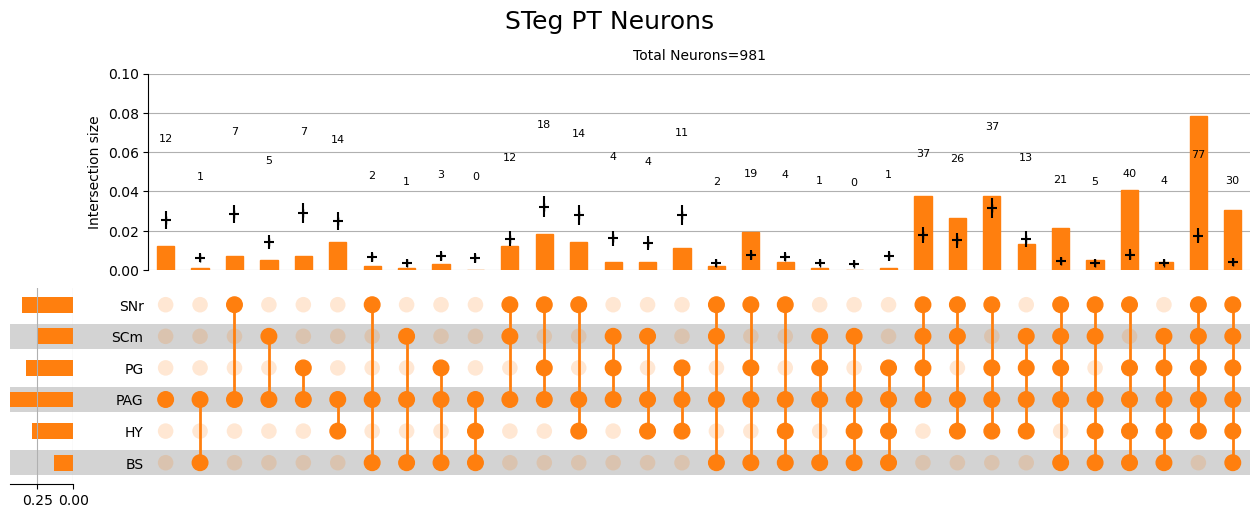

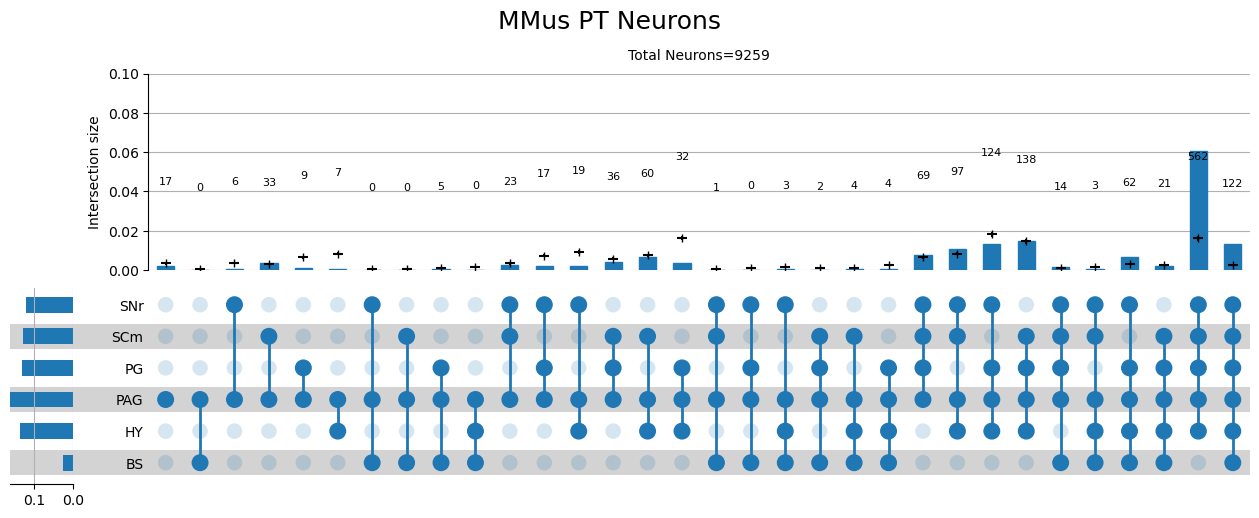

In [67]:
plot_pt = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]


# plot steg
# fancy_upsetplot(st_pt_all, plot_pt, reps=250, title="STeg PT Neurons", ymax=0.1, plot_legend=False)
# plt.show()

fancy_upsetplot(st_pt_all, plot_pt, reps=250, subset="PAG", title="STeg PT Neurons", ymax=0.1, plot_legend=False)
# plt.savefig(out_path+"st_pt_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()

# plot mmus
# fancy_upsetplot(mm_pt_all, plot_pt, reps=250, color="tab:blue", title="MMus PT Neurons", ymax=0.1, plot_legend=False)
# plt.show()

fancy_upsetplot(mm_pt_all, plot_pt, reps=250, subset="PAG", color="tab:blue", title="MMus PT Neurons", ymax=0.1, plot_legend=False)
# plt.savefig(out_path+"mm_pt_upset.jpg", dpi=300, bbox_inches="tight")
plt.show()



# modified upset plots
- plot grey bar for ci95 - emperically determined
- dot for real/observed proportion
- calc emperic p-value

## IT Cells

In [21]:
to_plot = ["OMCc", "AUD", "STR"]
motifs, simulations = motif_simulation(st_it_all, plot_areas=to_plot)
motif_prop = df_to_motif_proportion(st_it_all, areas=to_plot)

print(motif_prop)


AUD    OMCc   STR  
False  True   False    0.137013
True   False  False    0.031301
False  False  True     0.121087
True   True   False    0.023064
False  True   True     0.589237
True   False  True     0.024163
       True   True     0.074135
dtype: float64

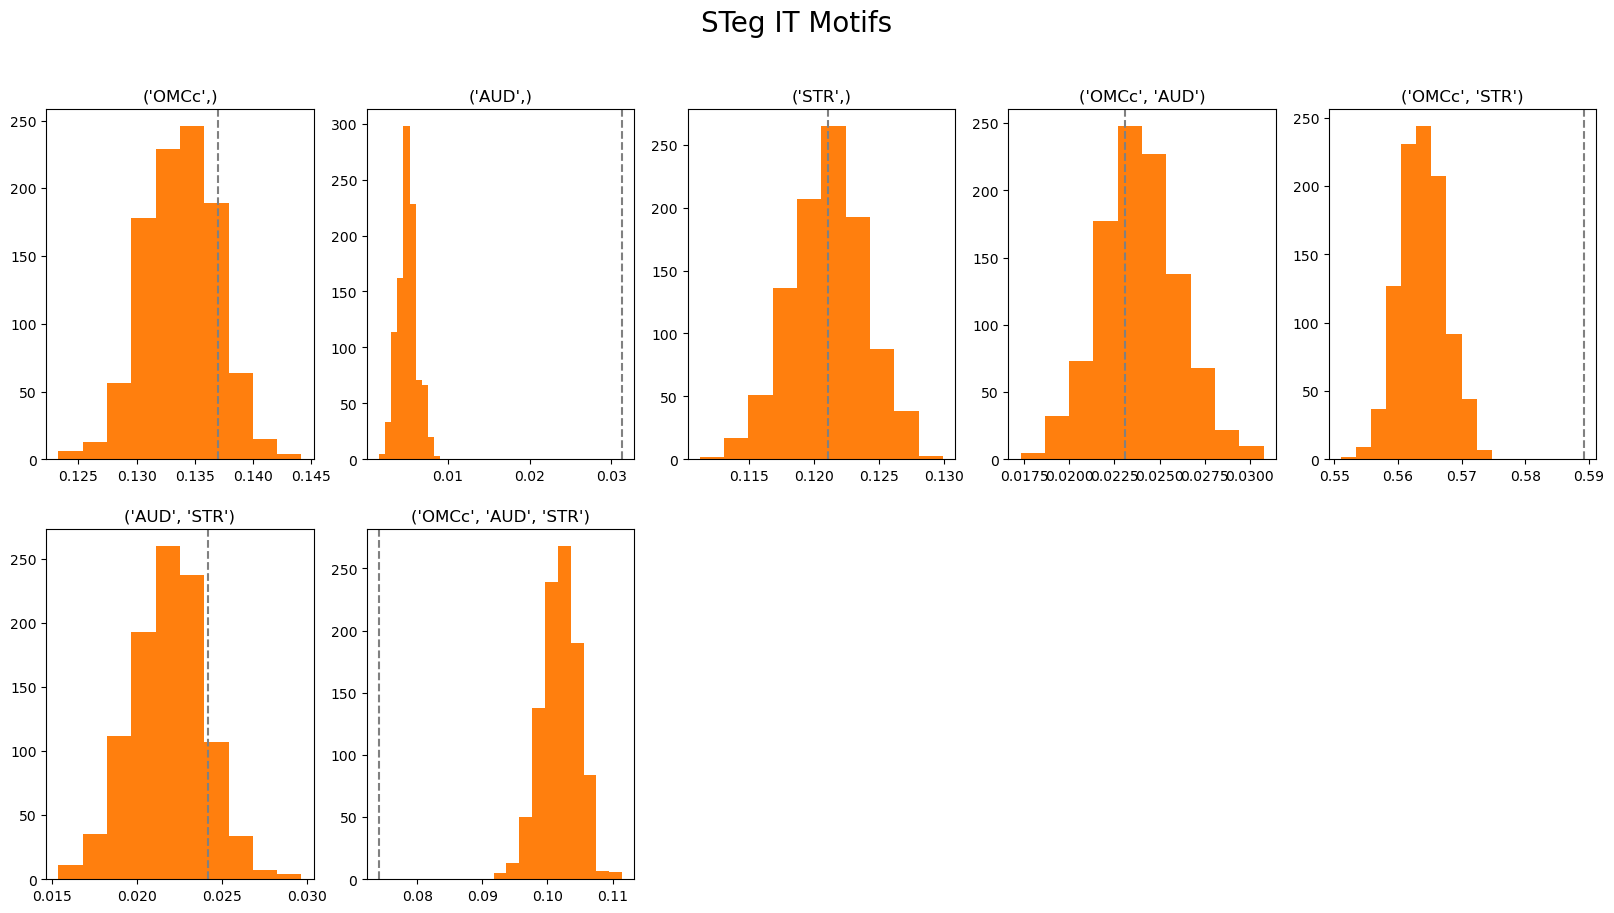

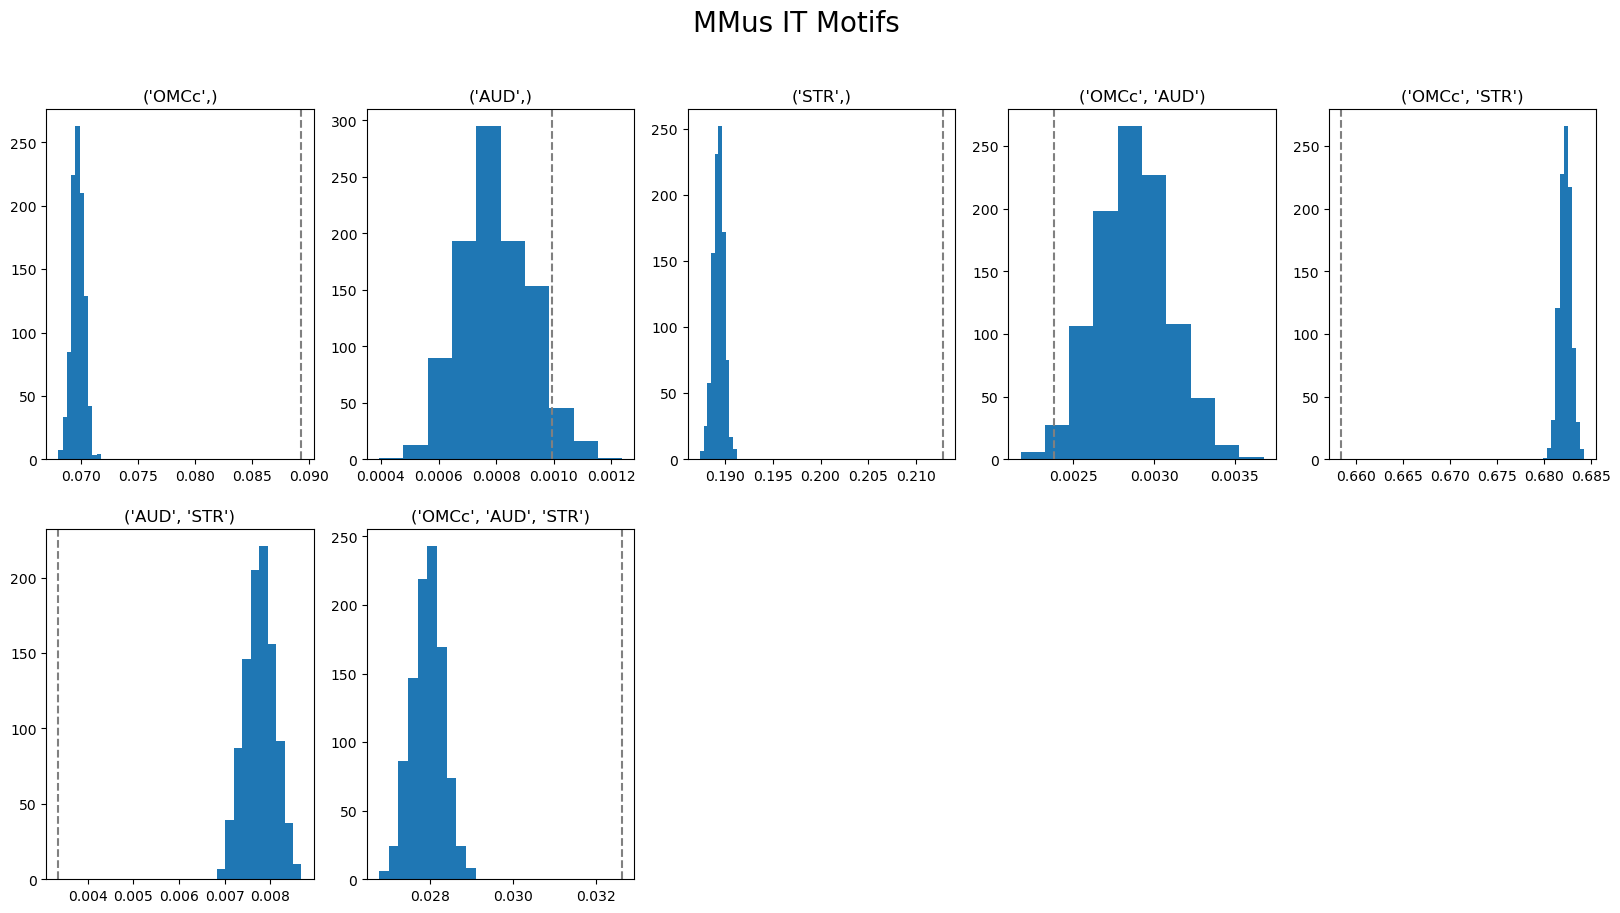

In [65]:
to_plot = ["OMCc", "AUD", "STR"]

plot_motif_hist_prop(st_it_all, title="STeg IT Motifs", reps=1000)
plt.show()

plot_motif_hist_prop(mm_it_all, title="MMus IT Motifs", color="tab:blue", reps=1000)
plt.show()

## PT cells

In [181]:
plot_pt = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]
motifs, simulations = motif_simulation(st_pt_all, plot_areas=plot_pt, subset="PAG")
motif_prop = df_to_motif_proportion(st_pt_all, areas=plot_pt, subset="PAG")
motif_prop

simulations.shape pre subset: , (500, 63)


BS     HY     PAG   PG     SCm    SNr  
False  False  True  False  False  False    0.012232
True   False  True  False  False  False    0.001019
False  False  True  False  False  True     0.007136
                           True   False    0.005097
                    True   False  False    0.007136
       True   True  False  False  False    0.014271
True   False  True  False  False  True     0.002039
                           True   False    0.001019
                    True   False  False    0.003058
       True   True  False  False  False    0.000000
False  False  True  False  True   True     0.012232
                    True   False  True     0.018349
       True   True  False  False  True     0.014271
       False  True  True   True   False    0.004077
       True   True  False  True   False    0.004077
                    True   False  False    0.011213
True   False  True  False  True   True     0.002039
                    True   False  True     0.019368
       True   True  Fals

simulations.shape pre subset: , (500, 63)


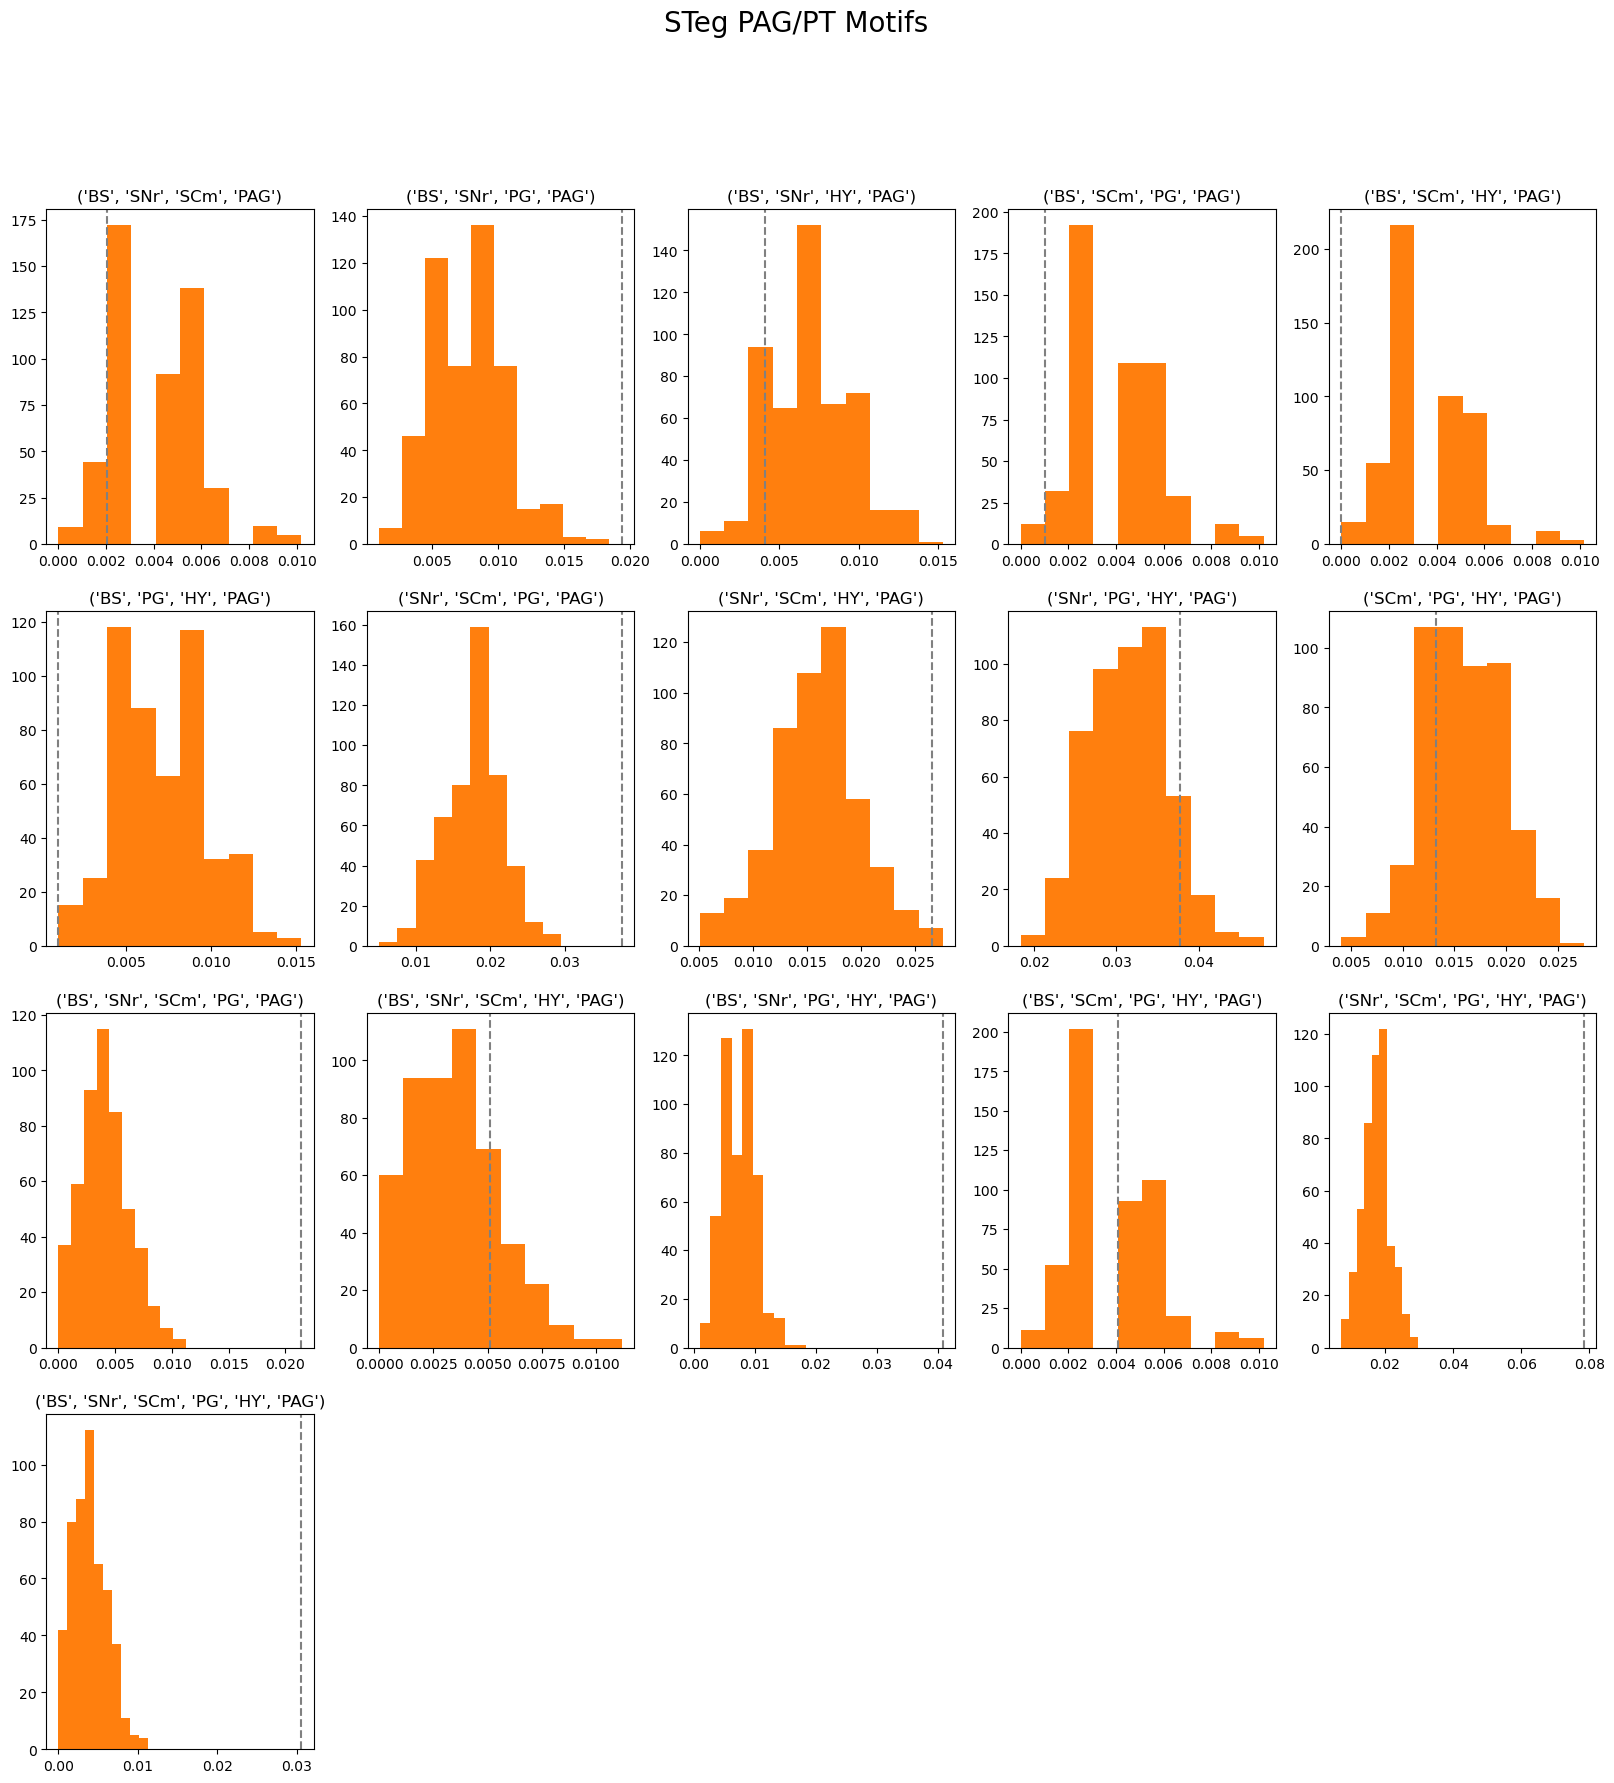

simulations.shape pre subset: , (500, 63)


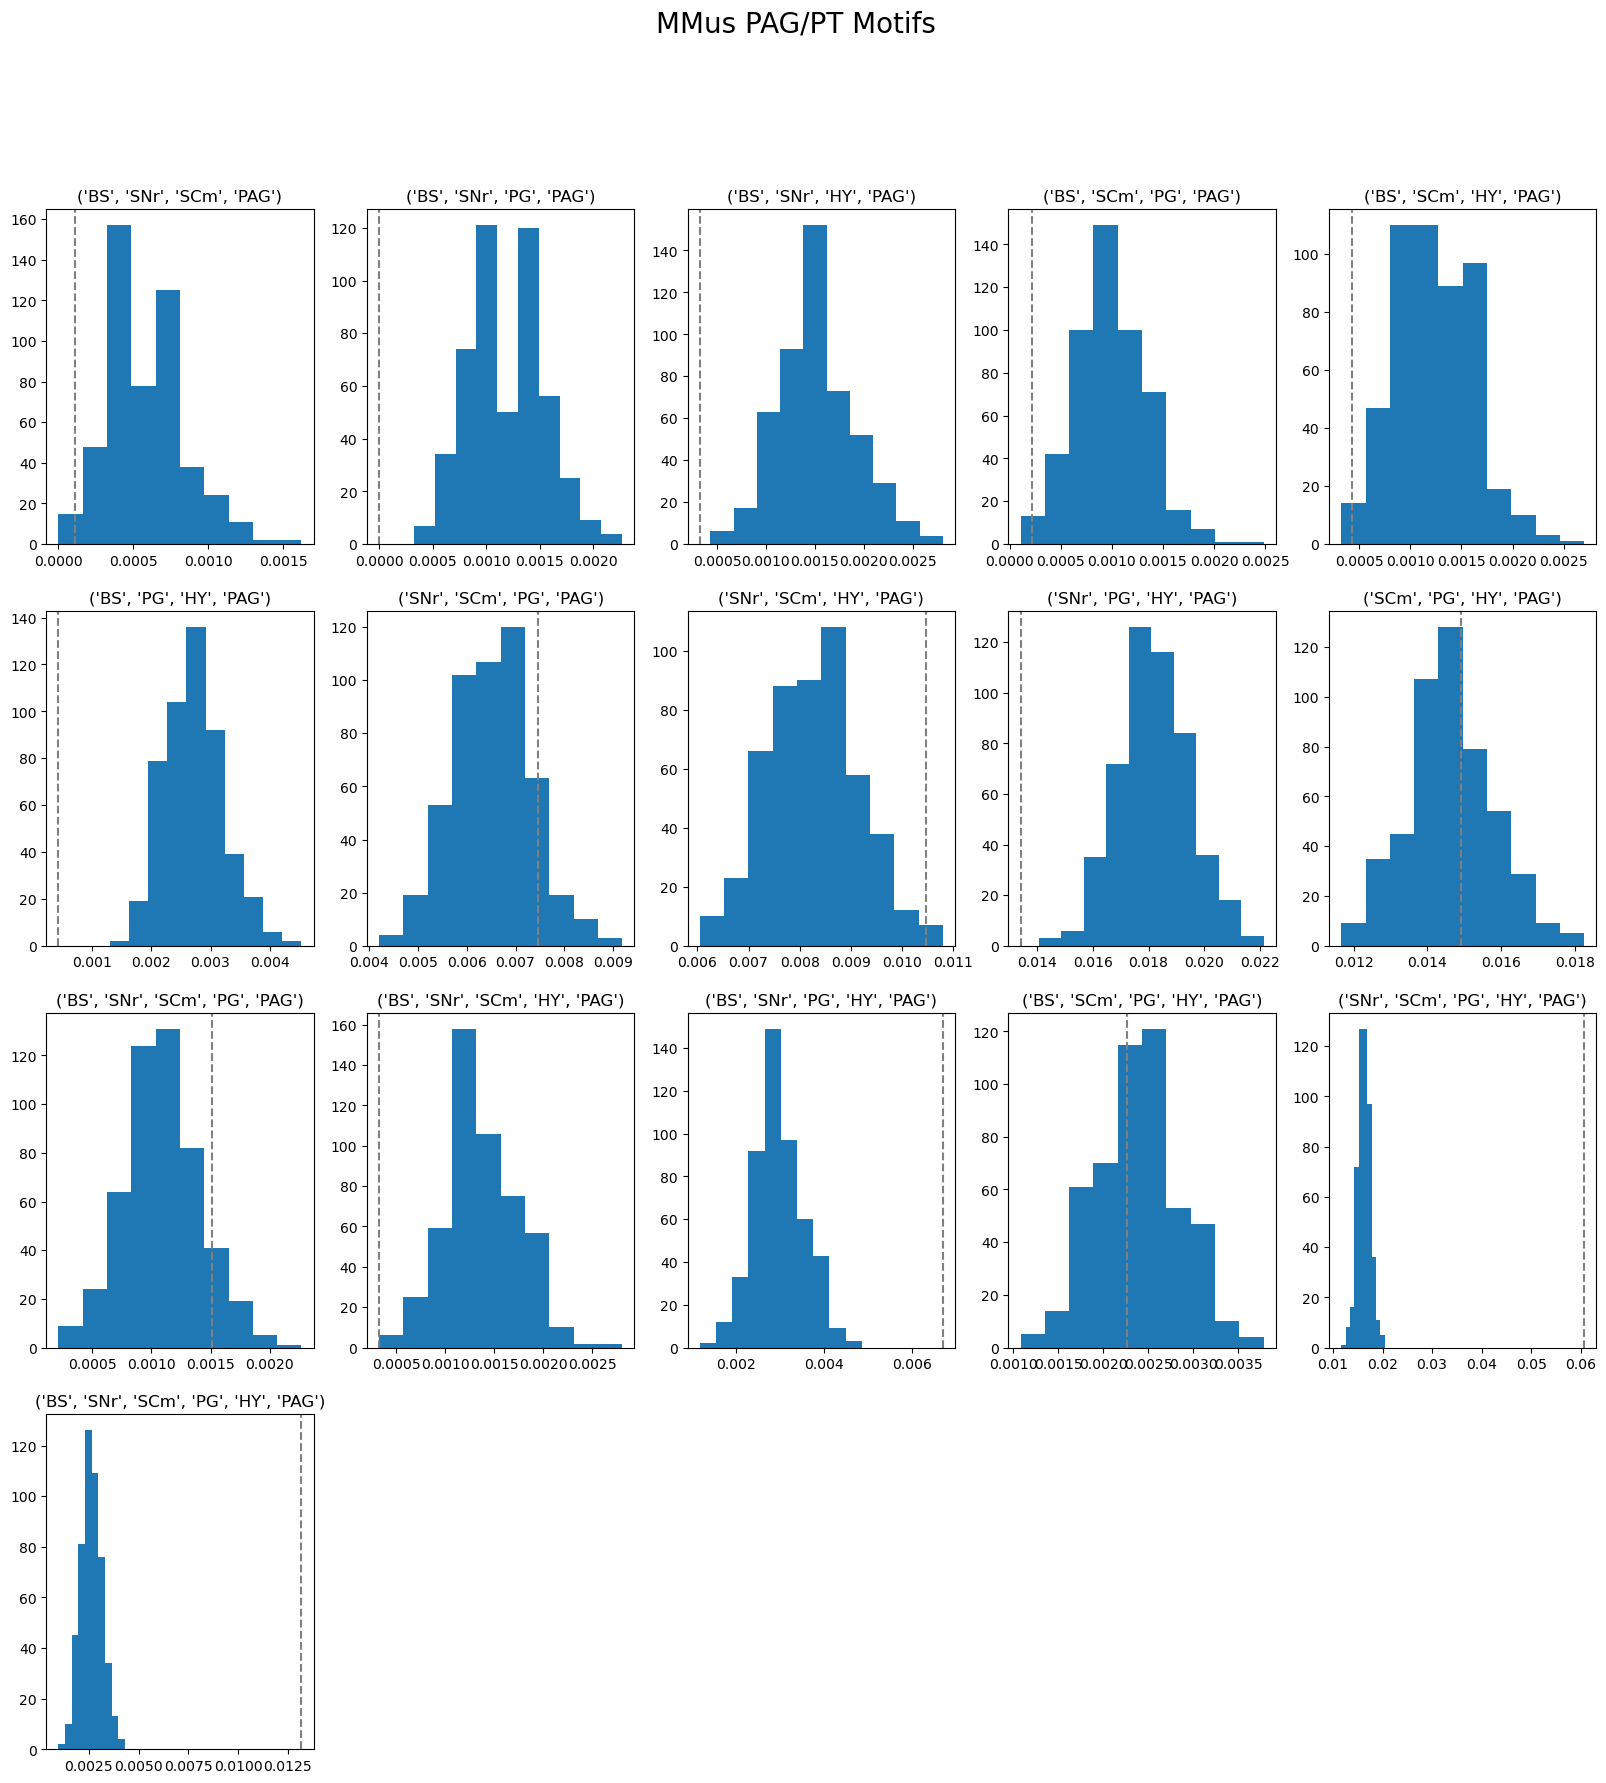

In [183]:
# plot simulated motif histograms w/ line for real value
plot_pt = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

plot_motif_hist_prop(st_pt_all, title="STeg PAG/PT Motifs", plot_areas=plot_pt,
                      subset_area="PAG", subset_idx=(16,32), reps=500)
plt.show()

plot_motif_hist_prop(mm_pt_all, title="MMus PAG/PT Motifs", color="tab:blue", 
                     subset_area="PAG", plot_areas=plot_pt, subset_idx=(16,32), reps=500)
plt.show()

# PT clean-up
- PAG+1, PAG+2, PAG+3...

In [137]:
# motifs, simulatioms

# generate motif counts
pag_count = df_to_motif_proportion(st_pt_all, plot_pt, proportion=False, subset="PAG")

pag_index = np.array(pag_count.index.tolist())

degree = pag_index.sum(axis=1)


# pag_df = pd.DataFrame(columns=["PAG", "PAG+1", "PAG+2", "PAG+3", "PAG+4", "PAG+5", "PAG+6(all)"])

st_count =  []
for i in range(1,7):
    idx = [j for j in range(pag_index.shape[0]) if degree[j]==i]
    st_count.append(pag_count[idx].sum())

st_prop = [c/st_pt_all.shape[0] for c in st_count]

print(st_count)
print(st_prop)


[12, 34, 69, 140, 147, 30]
[0.012232415902140673, 0.034658511722731905, 0.07033639143730887, 0.14271151885830785, 0.14984709480122324, 0.03058103975535168]


In [138]:
# motifs, simulatioms

# generate motif counts
pag_count = df_to_motif_proportion(mm_pt_all, plot_pt, proportion=False, subset="PAG")

pag_index = np.array(pag_count.index.tolist())

degree = pag_index.sum(axis=1)


# pag_df = pd.DataFrame(columns=["PAG", "PAG+1", "PAG+2", "PAG+3", "PAG+4", "PAG+5", "PAG+6(all)"])

mm_count =  []
for i in range(1,7):
    idx = [j for j in range(pag_index.shape[0]) if degree[j]==i]
    mm_count.append(pag_count[idx].sum())

mm_prop = [c/mm_pt_all.shape[0] for c in mm_count]

print(mm_count)
print(mm_prop)


[17, 55, 192, 442, 662, 122]
[0.0018360514094394643, 0.0059401663246570905, 0.02073658062425748, 0.04773733664542607, 0.07149800194405444, 0.013176368938330274]


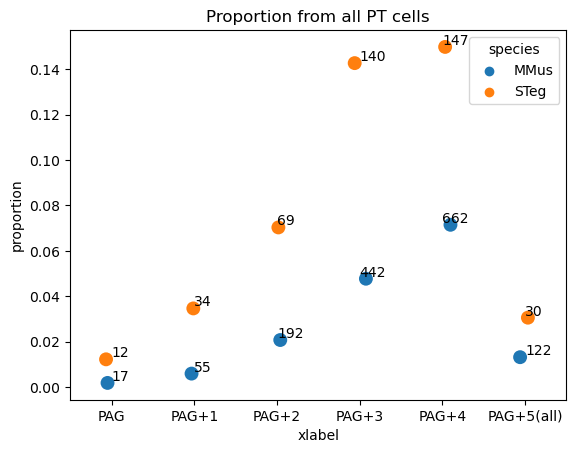

In [151]:
xlabels = ["PAG", "PAG+1", "PAG+2", "PAG+3", "PAG+4", "PAG+5(all)"]

st_df = pd.DataFrame({"xlabel":xlabels, "proportion":st_prop, "count":st_count, "species":"STeg"})
mm_df = pd.DataFrame({"xlabel":xlabels, "proportion":mm_prop, "count":mm_count, "species":"MMus"})
plot_df = pd.concat([mm_df, st_df]).reset_index(drop=True)

sns.stripplot(plot_df, x="xlabel", y="proportion", hue="species",
              size=10)
# annotate w/ count
for i in range(plot_df.shape[0]):
    plt.text(plot_df.loc[i,"xlabel"], plot_df.loc[i,"proportion"]+0.001,
             s=str(plot_df.loc[i,"count"]))
    
plt.title("Proportion from all PT cells")
plt.show()

In [155]:
# calculate proportion via all PAG not all PT cells
mm_pag = plot_df[plot_df["species"]=="MMus"]
mm_pag_tot = mm_pag["count"].sum()
st_pag = plot_df[plot_df["species"]=="STeg"]
st_pag_tot = st_pag["count"].sum()

for i in range(plot_df.shape[0]):
    if plot_df.loc[i, "species"]=="MMus":
        plot_df.loc[i,"pag_prop"] = plot_df.loc[i,"count"]/mm_pag_tot
    elif plot_df.loc[i,"species"]=="STeg":
        plot_df.loc[i,"pag_prop"] = plot_df.loc[i,"count"]/st_pag_tot

plot_df

,xlabel,proportion,count,species,pag_prop
0,PAG,0.001836,17,MMus,0.011409
1,PAG+1,0.005940,55,MMus,0.036913
2,PAG+2,0.020737,192,MMus,0.128859
3,PAG+3,0.047737,442,MMus,0.296644
4,PAG+4,0.071498,662,MMus,0.444295
5,PAG+5(all),0.013176,122,MMus,0.081879
6,PAG,0.012232,12,STeg,0.027778
7,PAG+1,0.034659,34,STeg,0.078704
8,PAG+2,0.070336,69,STeg,0.159722
9,PAG+3,0.142712,140,STeg,0.324074


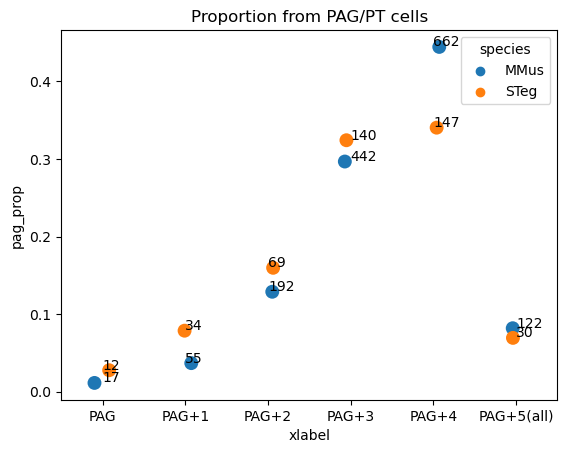

In [158]:
sns.stripplot(plot_df, x="xlabel", y="pag_prop", hue="species",
              size=10)
# annotate w/ count
for i in range(plot_df.shape[0]):
    plt.text(plot_df.loc[i,"xlabel"], plot_df.loc[i,"pag_prop"]+0.001,
             s=str(plot_df.loc[i,"count"]))
    
plt.title("Proportion from PAG/PT cells")
plt.show()

Text(0.5, 1.0, 'Degree distribution for PAG/PT cells')

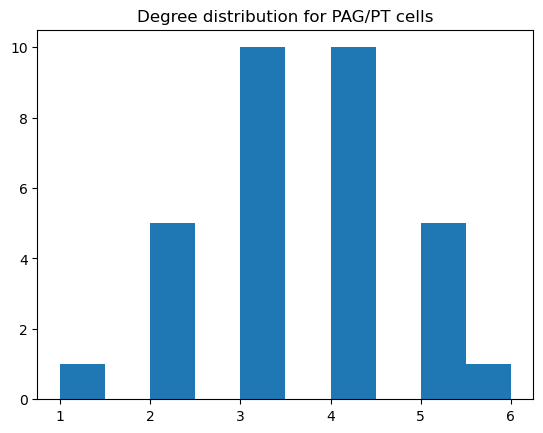

In [161]:
plt.hist(degree)
plt.title("Degree distribution for PAG/PT cells")

# Add PAB to histogram plots

## IT Cells

In [ ]:
# mm_it_prop = df_to_motif_proportion(mm_it_all, areas=plot_it, proportion=True)
# mm_it_pab = df_to_calc_pab_proportions(mm_it_all, mm_it_prop.index)

st_it_prop = df_to_motif_proportion(st_it_all, areas=plot_it, proportion=True)
st_it_pab = df_to_calc_pab_proportions(st_it_all, st_it_prop.index)

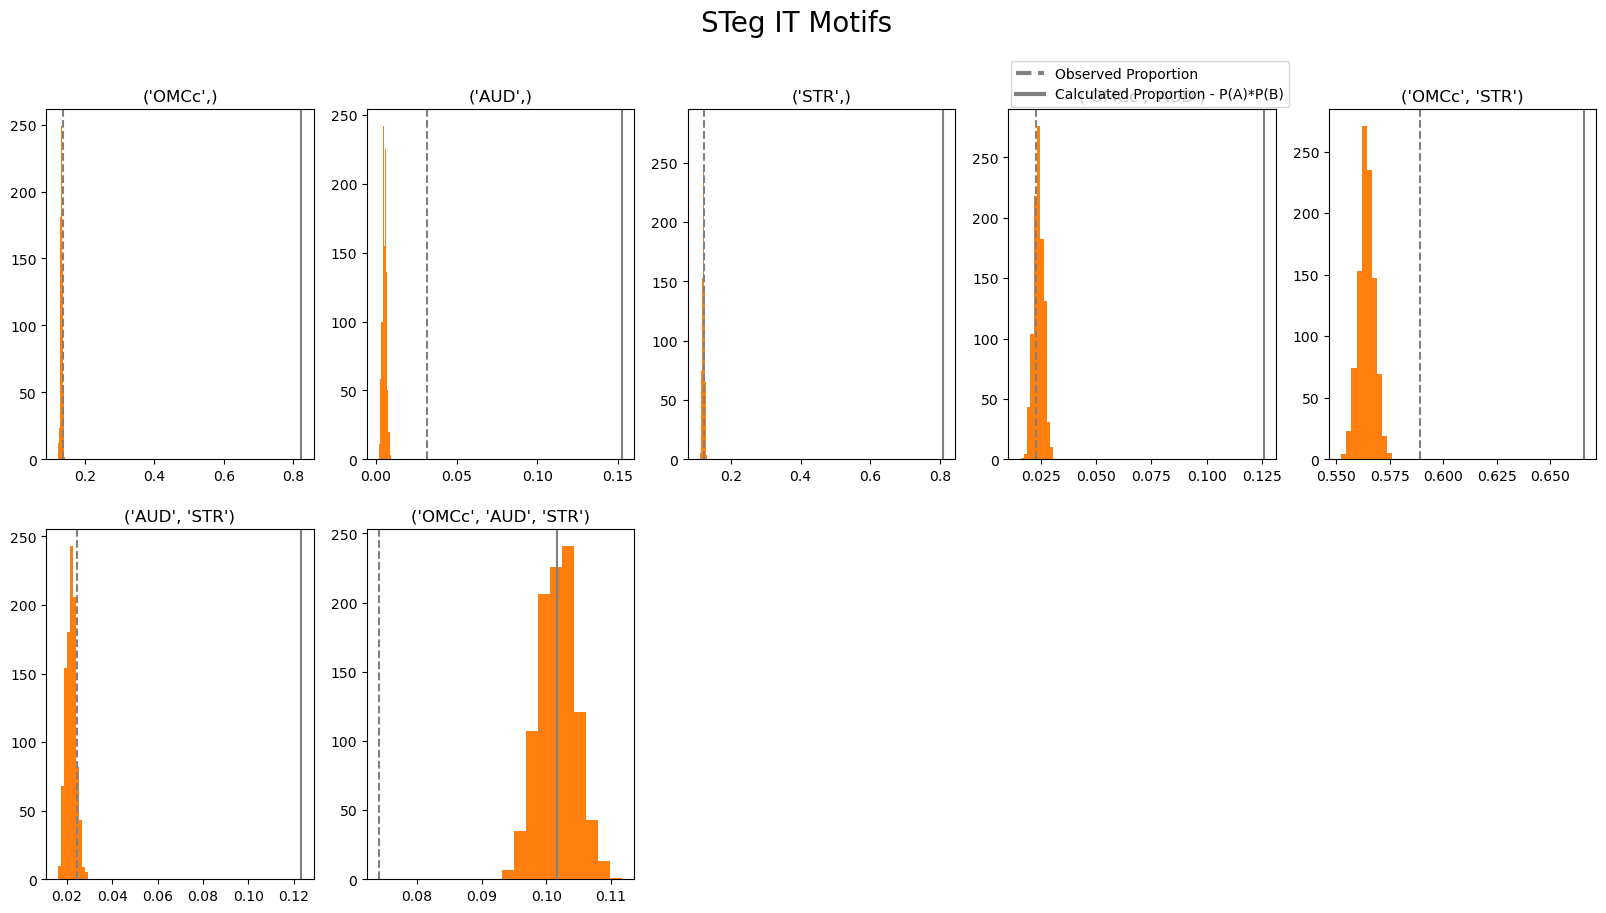

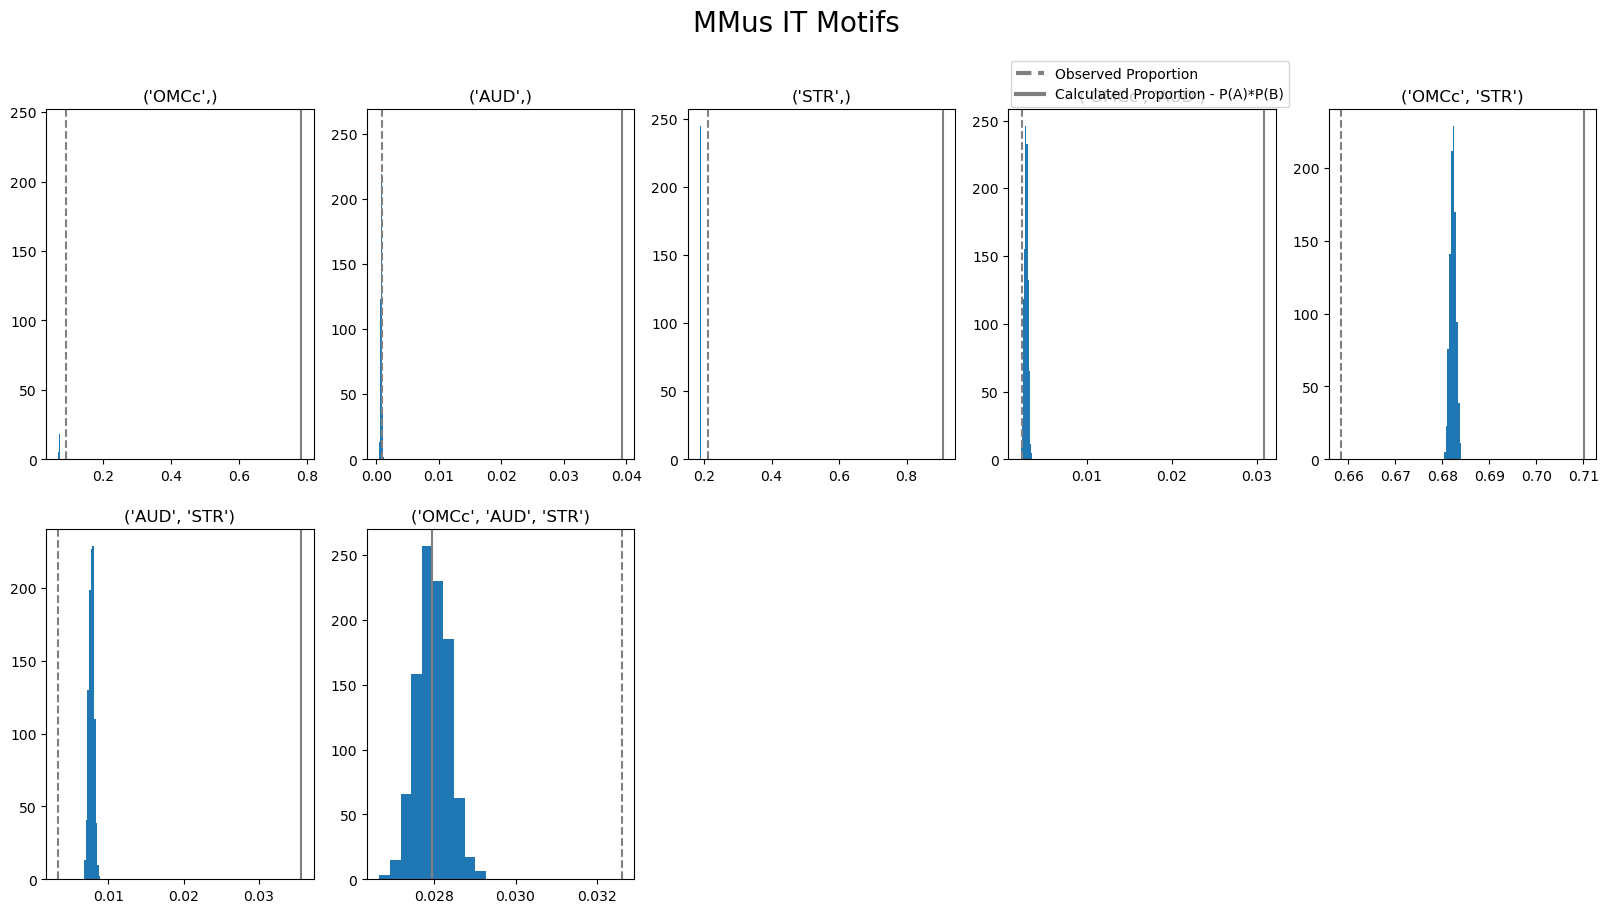

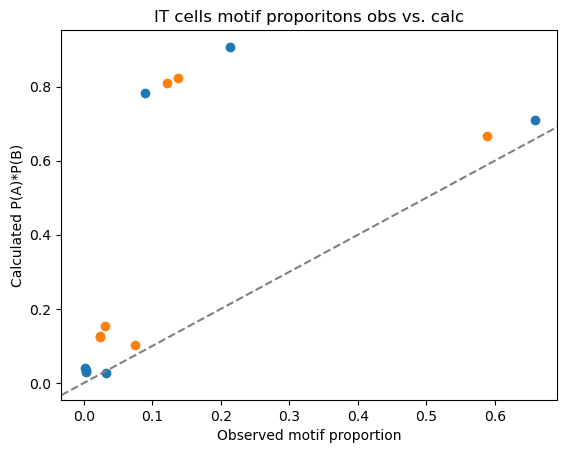

In [259]:
to_plot = ["OMCc", "AUD", "STR"]

plot_motif_hist_prop(st_it_all, title="STeg IT Motifs", reps=1000, plot_pab=True)
plt.show()

plot_motif_hist_prop(mm_it_all, title="MMus IT Motifs", color="tab:blue", reps=1000, plot_pab=True)
plt.show()

## obs vs calc motif proportions

mm_motif_prop = df_to_motif_proportion(mm_it_all, areas=plot_it, proportion=True)
mm_motif_calc_prop = df_to_calc_pab_proportions(mm_it_all, mm_motif_prop.index)
st_motif_prop = df_to_motif_proportion(st_it_all, areas=plot_it, proportion=True)
st_motif_calc_prop = df_to_calc_pab_proportions(st_it_all, st_motif_prop.index)

plt.scatter(mm_motif_prop, mm_motif_calc_prop, label="MMus")
plt.scatter(st_motif_prop, st_motif_calc_prop, label="STeg")
plt.xlabel("Observed motif proportion")
plt.ylabel("Calculated P(A)*P(B)")
plt.title("IT cells motif proporitons obs vs. calc")
plt.axline((0,0), (0.08,0.08), color="grey", linestyle="--")
plt.show()


## PT Cells

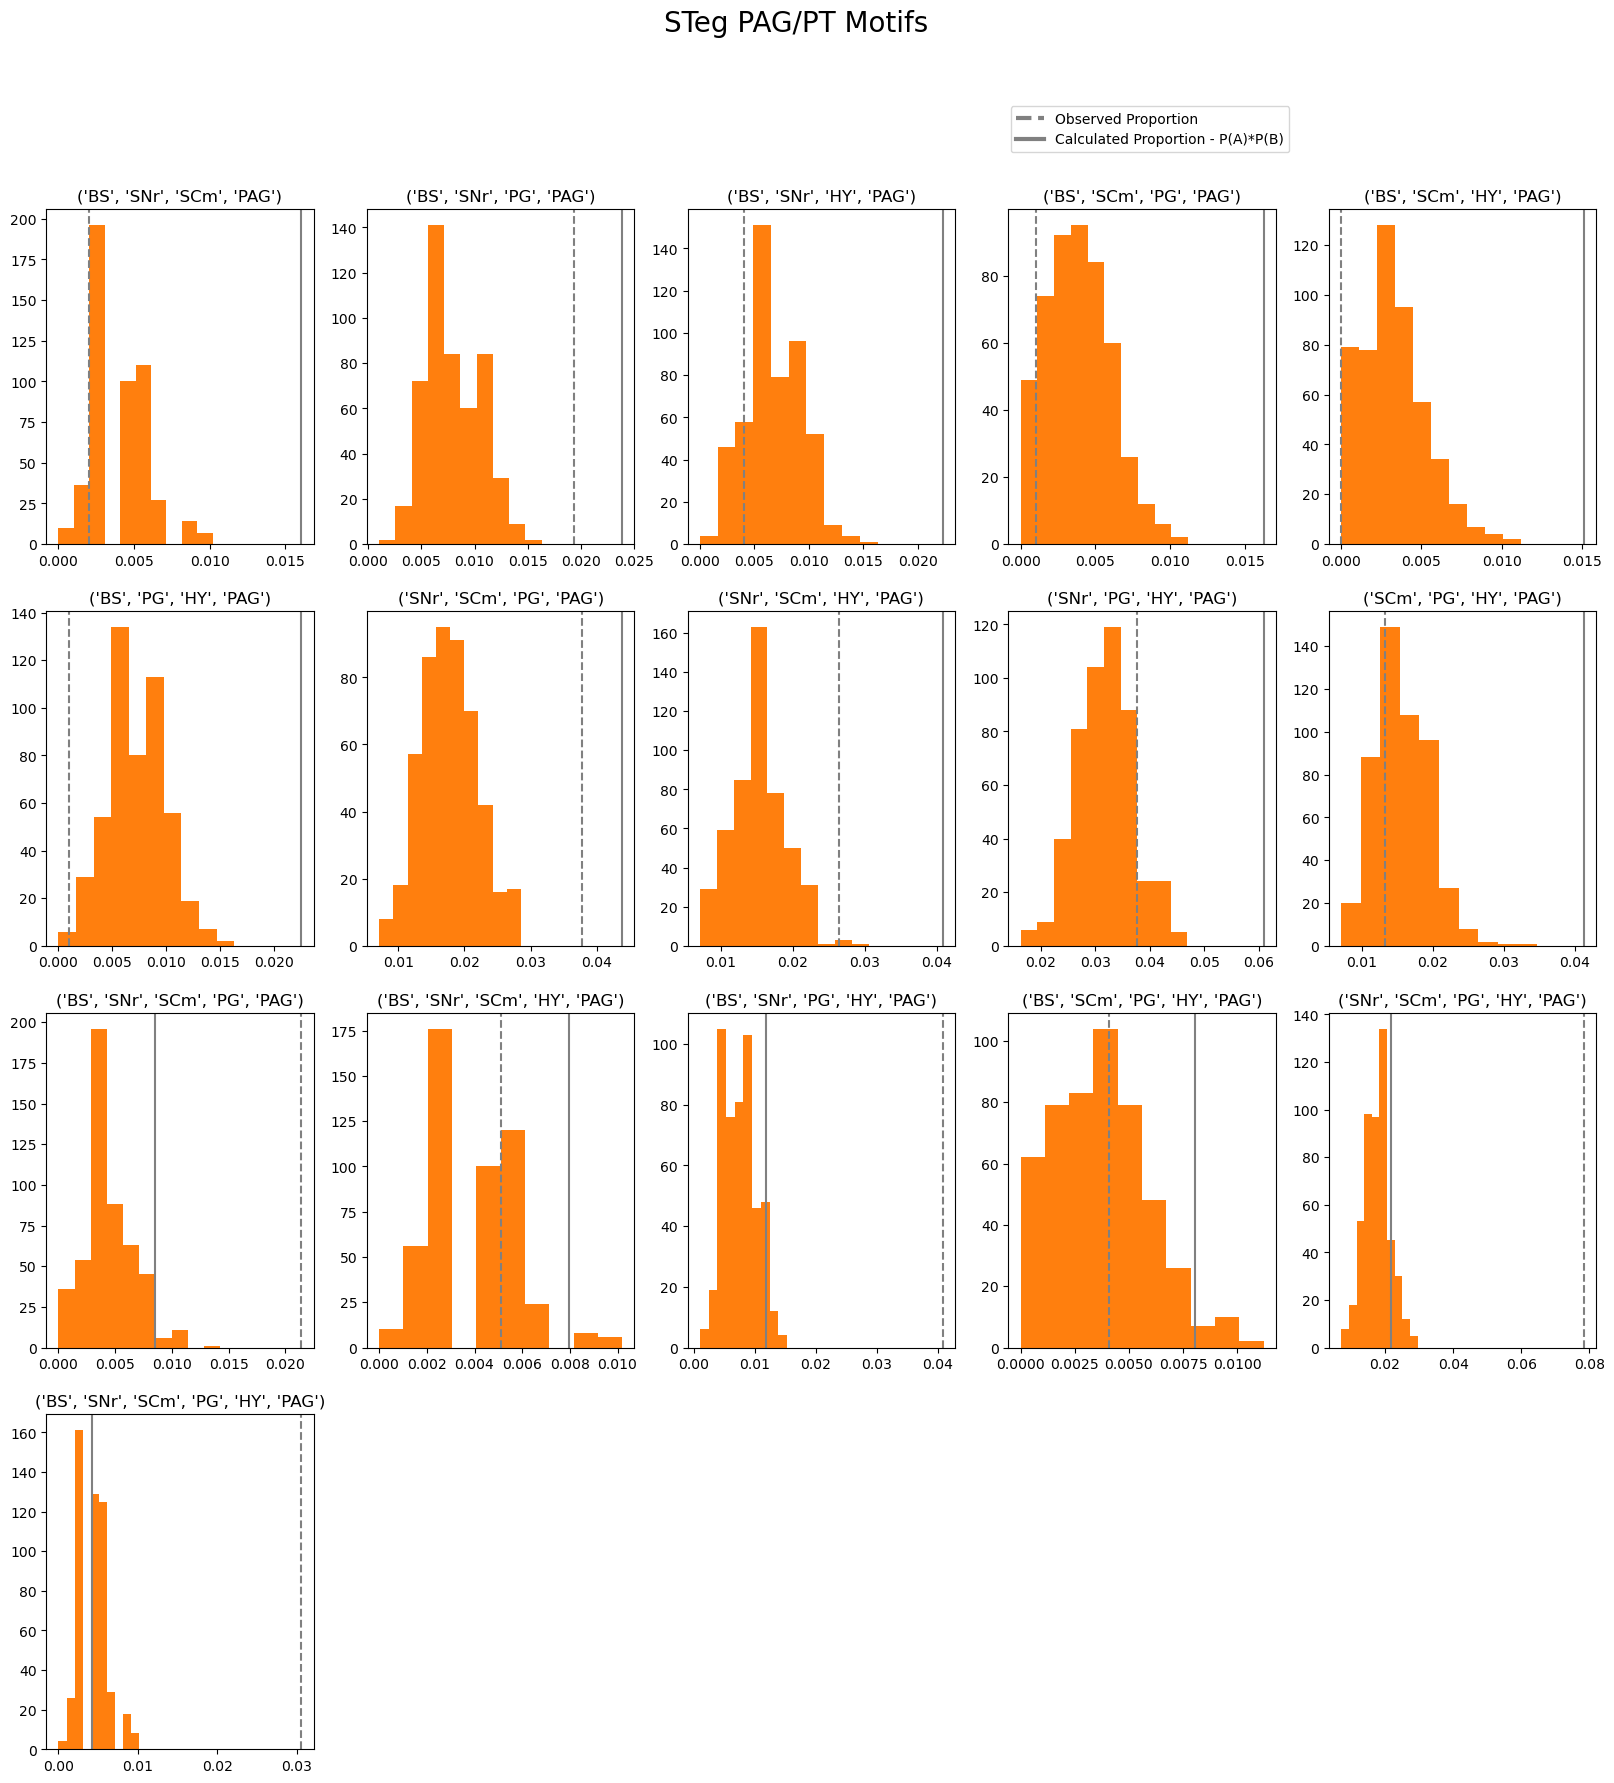

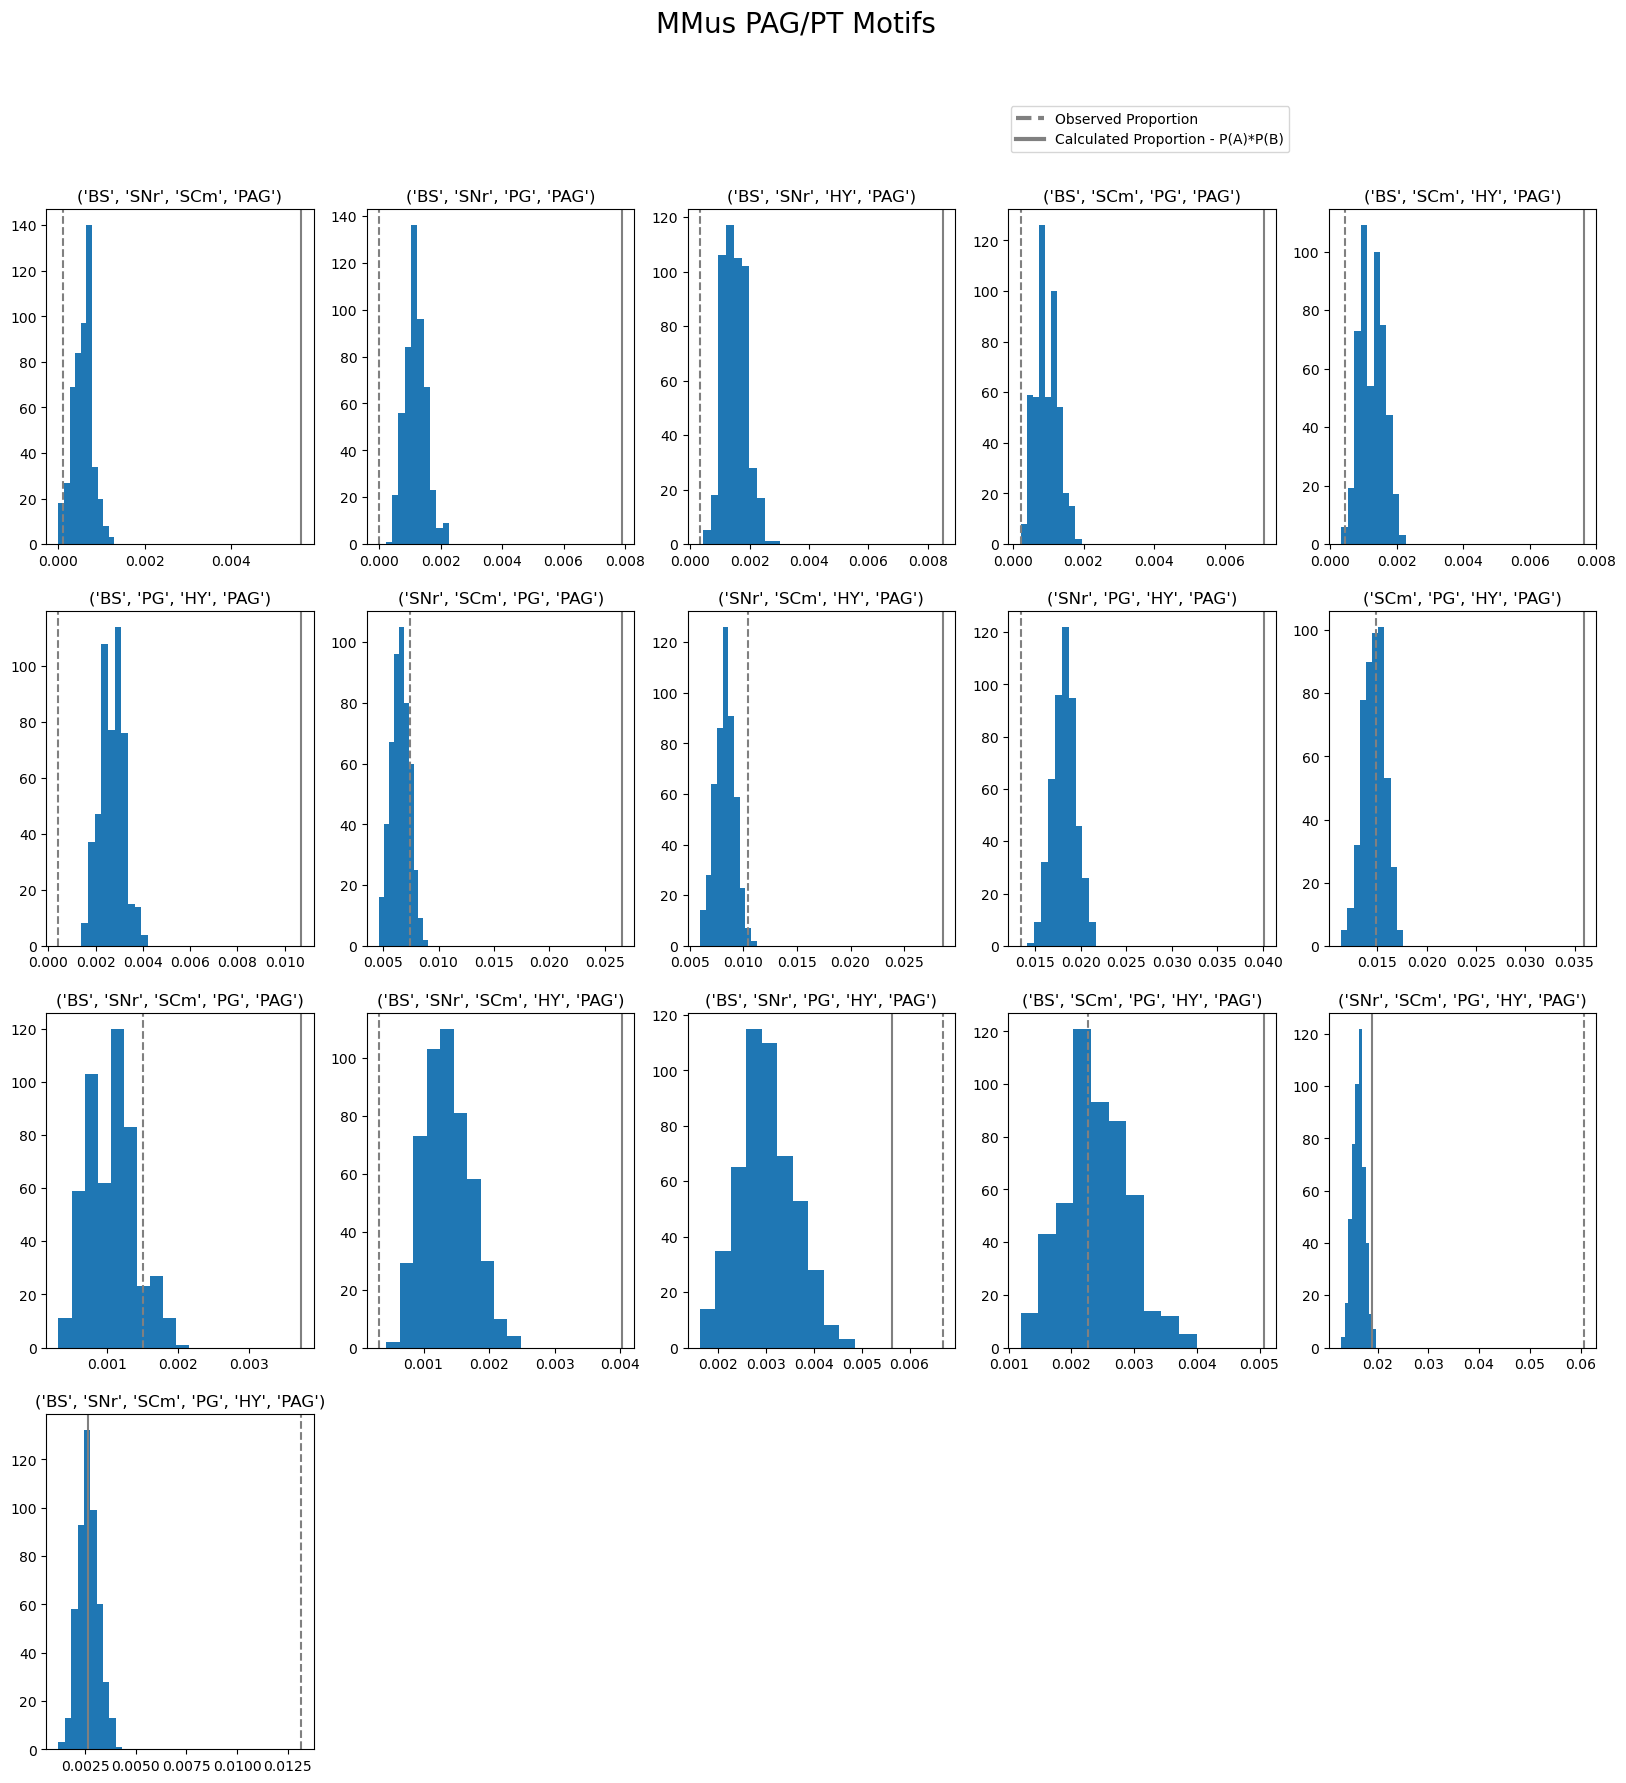

In [257]:
# plot simulated motif histograms w/ line for real value
plot_pt = ["BS", "SNr", "SCm", "PG", "HY", "PAG"]

plot_motif_hist_prop(st_pt_all, title="STeg PAG/PT Motifs", plot_areas=plot_pt,
                      subset_area="PAG", subset_idx=(16,32), reps=500, plot_pab=True)
plt.show()

plot_motif_hist_prop(mm_pt_all, title="MMus PAG/PT Motifs", color="tab:blue", 
                     subset_area="PAG", plot_areas=plot_pt, subset_idx=(16,32), 
                     reps=500, plot_pab=True)
plt.show()

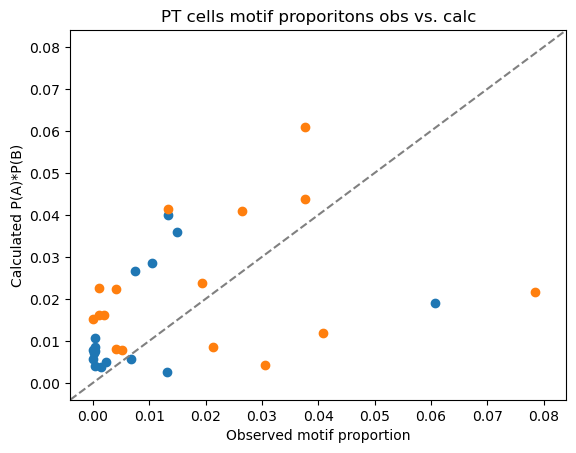

In [258]:
# pt cells plot

mm_motif_prop = df_to_motif_proportion(mm_pt_all, areas=plot_pt, proportion=True, subset="PAG")
mm_motif_calc_prop = df_to_calc_pab_proportions(mm_pt_all, mm_motif_prop.index)
st_motif_prop = df_to_motif_proportion(st_pt_all, areas=plot_pt, proportion=True, subset="PAG")
st_motif_calc_prop = df_to_calc_pab_proportions(st_pt_all, st_motif_prop.index)

plt.scatter(mm_motif_prop[16:32], mm_motif_calc_prop[16:32], label="MMus")
plt.scatter(st_motif_prop[16:32], st_motif_calc_prop[16:32], label="STeg")
plt.xlabel("Observed motif proportion")
plt.ylabel("Calculated P(A)*P(B)")
plt.title("PT cells motif proporitons obs vs. calc")
plt.axline((0,0), (0.08,0.08), color="grey", linestyle="--")
plt.show()